In [5]:
import pandas as pd

data1 = pd.read_csv('bank-additional-full.csv', sep=';')
data2 = pd.read_csv('bank-additional.csv', sep=';')
data3 = pd.read_csv('bank-full.csv', sep=';')
data4 = pd.read_csv('bank.csv', sep=';')

# Menggabungkan semua data menjadi satu dataset
data = pd.concat([data1, data2, data3, data4], ignore_index=True)

data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,balance,day
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,NaN
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,NaN
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,NaN
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,NaN
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,NaN


In [6]:
#Membersihkan data dengan menghapus kolom-kolom yang tidak relevan atau tidak diperlukan untuk memprediksi target ("y").

data = data.drop(['contact', 'month', 'day_of_week', 'poutcome'], axis=1)


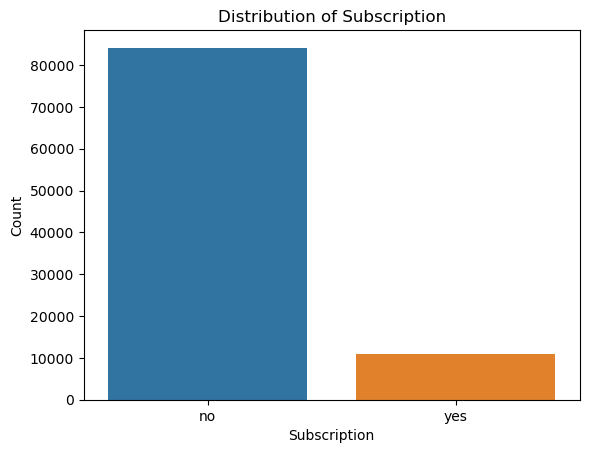

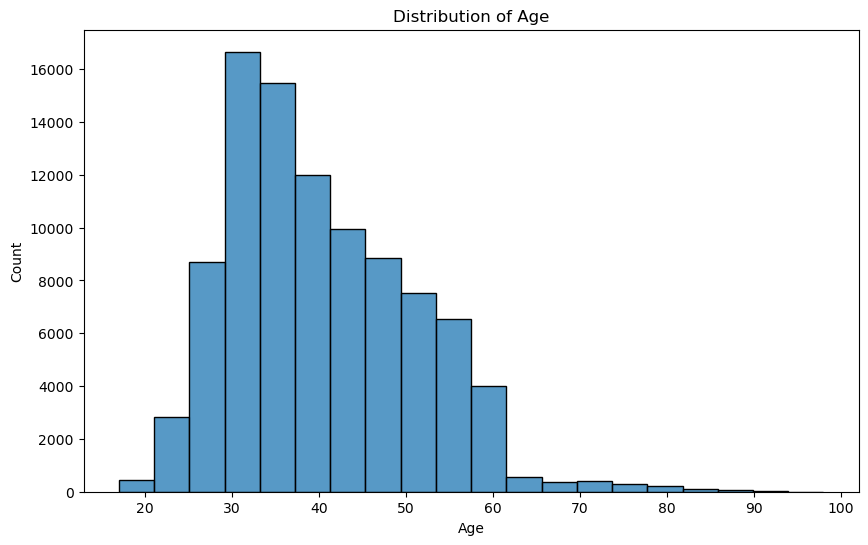

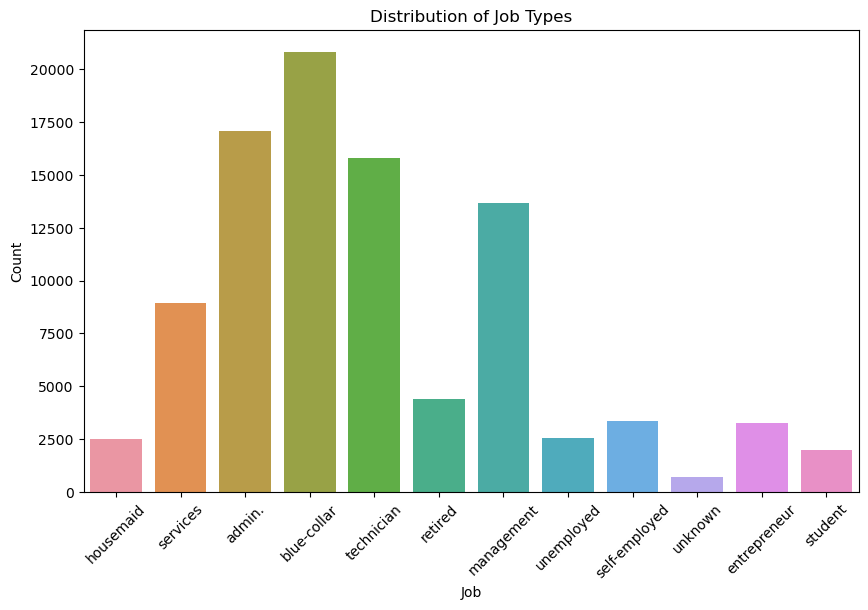

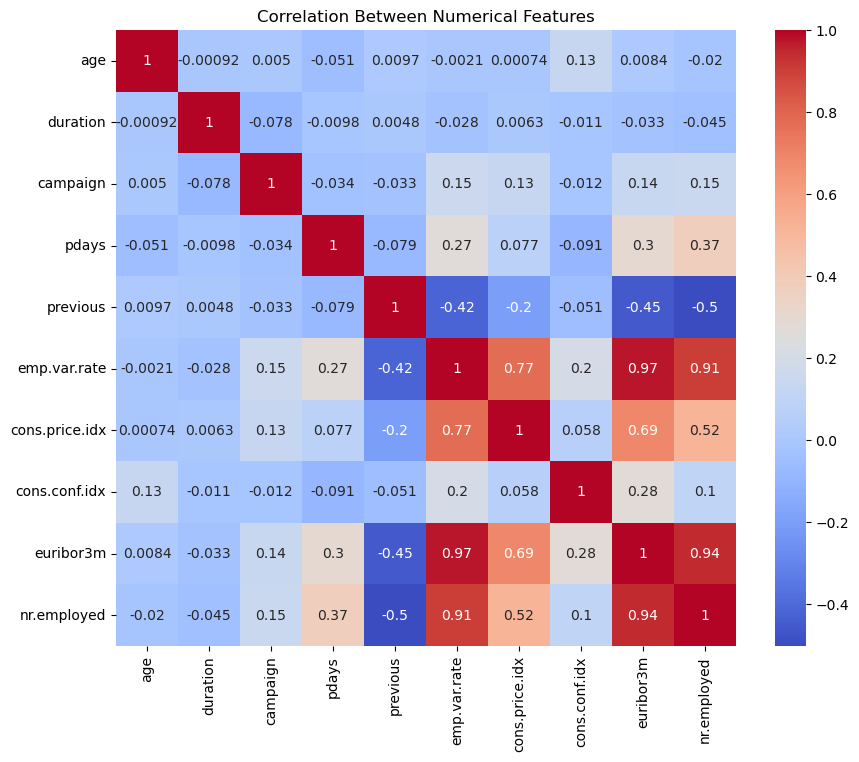

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the distribution of the target variable
sns.countplot(x='y', data=data)
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.title('Distribution of Subscription')
plt.show()

# Visualize the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(x='age', data=data, bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

# Visualize the distribution of the job types
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=data)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Distribution of Job Types')
plt.xticks(rotation=45)
plt.show()

# Visualize the correlation between numerical features
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

In [8]:
missing_columns = data.columns[data.isnull().any()]


In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data[missing_columns] = imputer.fit_transform(data[missing_columns])


In [10]:
print(data.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'balance', 'day'],
      dtype='object')


In [11]:
#Mengubah variabel kategorikal menjadi bentuk numerik menggunakan one-hot encoding atau label encoding.

from sklearn.preprocessing import LabelEncoder

# Melakukan label encoding pada kolom target "y"
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])

# Melakukan one-hot encoding pada kolom-kolom kategorikal lainnya jika diperlukan
data = pd.get_dummies(data)


In [12]:
#Pisahkan dataset menjadi atribut (fitur) dan target.

X = data.drop('y', axis=1)
y = data['y']


In [13]:
#Bagi dataset menjadi set pelatihan (training set) dan set pengujian (test set).

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

# Model Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg_pred = logreg.predict(X_test)

/Users/ilhamwardana/tensorflow-test/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


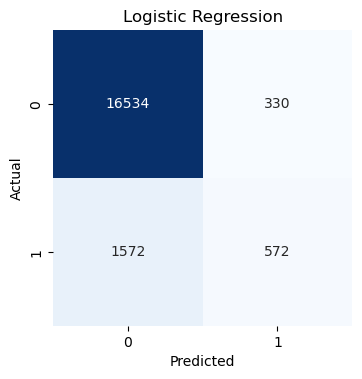

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix Logistic Regression
logreg_cm = confusion_matrix(y_test, logreg_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))

plt.subplot(2, 3, 1)
sns.heatmap(logreg_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)

print("Logistic Regression:")
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1-Score:", logreg_f1)
print()

Logistic Regression:
Accuracy: 0.8999368686868687
Precision: 0.6341463414634146
Recall: 0.2667910447761194
F1-Score: 0.3755745239658569



### KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Model K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)


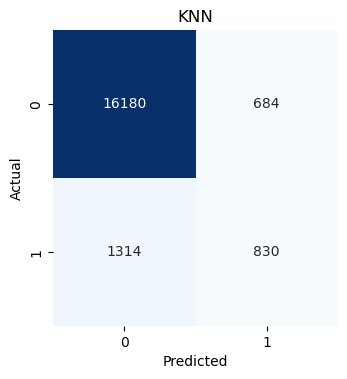

KNN:
Accuracy: 0.8948863636363636
Precision: 0.5482166446499339
Recall: 0.3871268656716418
F1-Score: 0.4537998906506287



In [18]:
# Confusion matrix KNN
knn_cm = confusion_matrix(y_test, knn_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
plt.subplot(2, 3, 2)
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

print("KNN:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-Score:", knn_f1)
print()


### SVM

In [19]:
from sklearn.svm import SVC

# Model Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)


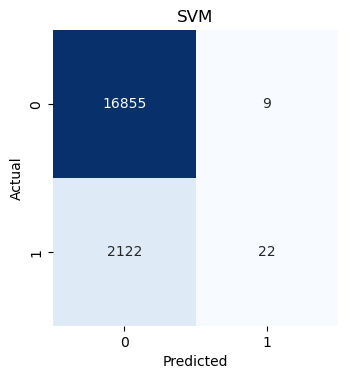

SVM:
Accuracy: 0.8878893097643098
Precision: 0.7096774193548387
Recall: 0.010261194029850746
F1-Score: 0.020229885057471267



In [20]:
# Confusion matrix SVM
svm_cm = confusion_matrix(y_test, svm_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
plt.subplot(2, 3, 3)
sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

print("SVM:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-Score:", svm_f1)
print()

### Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

# Model Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

nb_pred = nb.predict(X_test)


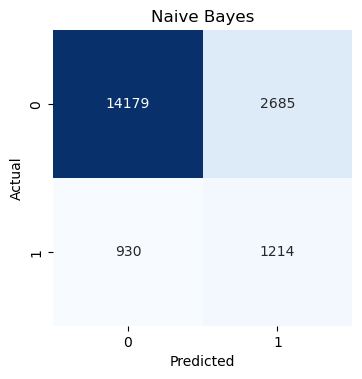

Naive Bayes:
Accuracy: 0.8098169191919192
Precision: 0.3113618876635035
Recall: 0.566231343283582
F1-Score: 0.4017871917921562



In [22]:
# Confusion matrix Naive Bayes
nb_cm = confusion_matrix(y_test, nb_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
plt.subplot(2, 3, 4)
sns.heatmap(nb_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)

print("Naive Bayes:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-Score:", nb_f1)
print()


### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Model Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)



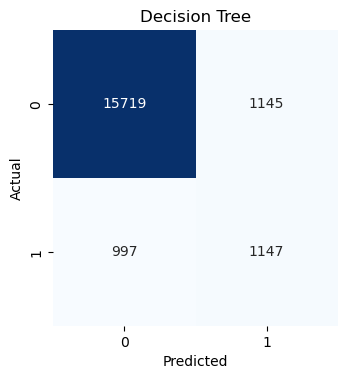

Decision Tree:
Accuracy: 0.8873106060606061
Precision: 0.5004363001745201
Recall: 0.534981343283582
F1-Score: 0.5171325518485123



In [24]:
# Confusion matrix Decision Tree
dt_cm = confusion_matrix(y_test, dt_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
plt.subplot(2, 3, 5)
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-Score:", dt_f1)
print()

### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Model Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)


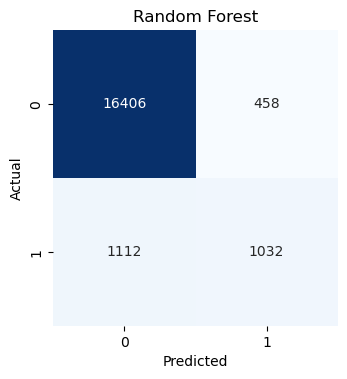

Random Forest:
Accuracy: 0.9174031986531986
Precision: 0.6926174496644295
Recall: 0.48134328358208955
F1-Score: 0.5679691799669785



In [26]:
# Confusion matrix Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)


# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
plt.subplot(2, 3, 6)
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-Score:", rf_f1)
print()

### Memilih algoritma yang paling sesuai berdasarkan metrik evaluasi

In [27]:
best_algorithm = max([(logreg_accuracy, 'Logistic Regression'), 
                     (knn_accuracy, 'KNN'), 
                     (svm_accuracy, 'SVM'), 
                     (nb_accuracy, 'Naive Bayes'), 
                     (dt_accuracy, 'Decision Tree'), 
                     (rf_accuracy, 'Random Forest')])

print("Algoritma dengan akurasi tertinggi:", best_algorithm[1])

Algoritma dengan akurasi tertinggi: Random Forest


##### Random Forest memiliki kemampuan untuk menangani klasifikasi dengan baik pada berbagai jenis dataset.
##### Random Forest dapat dengan mudah menangani dataset yang memiliki campuran fitur numerik dan kategorikal. 
##### penggunaan pengukuran seperti feature importance, Random Forest dapat memberikan wawasan tentang fitur-fitur yang paling berpengaruh dalam mempengaruhi hasil klasifikasi. Ini dapat membantu dalam pemahaman dan interpretasi model.
##### Stabilitas dan toleransi terhadap data yang tidak seimbang